In [53]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import analysis_quicklook as aq

sns.set_style("whitegrid")

In [2]:
runID = 328536
pedID = 326709
mod_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 100, 103, 106, 107, 108, 111, 112, 114, 115, 119, 121, 123, 124, 125, 126]
datadir = "/data/wipac/CTA/target5and7data/runs_320000_through_329999"
savedir = f"{datadir}/run{runID}"
make = aq.Quicklooker(pedID, runID, mod_list, datadir, savedir)

Initializing quicklook!
Trying to create save directory at: /data/wipac/CTA/target5and7data/runs_320000_through_329999/run328536
Pedestal database found!
Calibrated data found!


In [3]:
rate = 10. # Hz
flashers = make.flasher_cuts(rate)

Performing flasher cut.
[0, 2, 2114, 3993, 5739, 7414, 9025, 10616, 12163, 13703, 15211, 16714, 18223, 19735, 21219, 22629, 24054, 24473, 25240, 25621, 26444, 27878, 29300, 30735, 32177, 33615, 35072, 36506, 37935, 39354, 40741, 42165, 43607, 45005, 45371, 45382]


In [4]:
#In this cell, let's try and identify the transition from OFF to ON (on Crab)
datafile = f"/data/wipac/CTA/target5and7data/runs_320000_through_329999/run{runID}/event_stats_run{runID}.txt"

events, time_s, time_ns, charge_max, \
charge_mean, charge_std, p2p_max, \
p2p_mean, p2p_std, width, length, miss, dis, azwidth = np.loadtxt(datafile, delimiter=", ", skiprows=1, unpack=True)

events = events.astype("int")
time_s *= 10**9
time_stamp = time_s + time_ns
time_stamp -= time_stamp[0]

time_stamp_delta_ts = [j - i for i, j in zip(time_stamp[:-1], time_stamp[1:])]
print(len(events))
print(np.asarray(time_stamp_delta_ts).argmax())

45382
37934


3680.123775232


(array([2., 0., 0., ..., 4., 1., 4.]),
 array([0.00000000e+00, 1.00003363e+09, 2.00006727e+09, ...,
        3.67812371e+12, 3.67912374e+12, 3.68012378e+12]),
 <a list of 3680 Patch objects>)

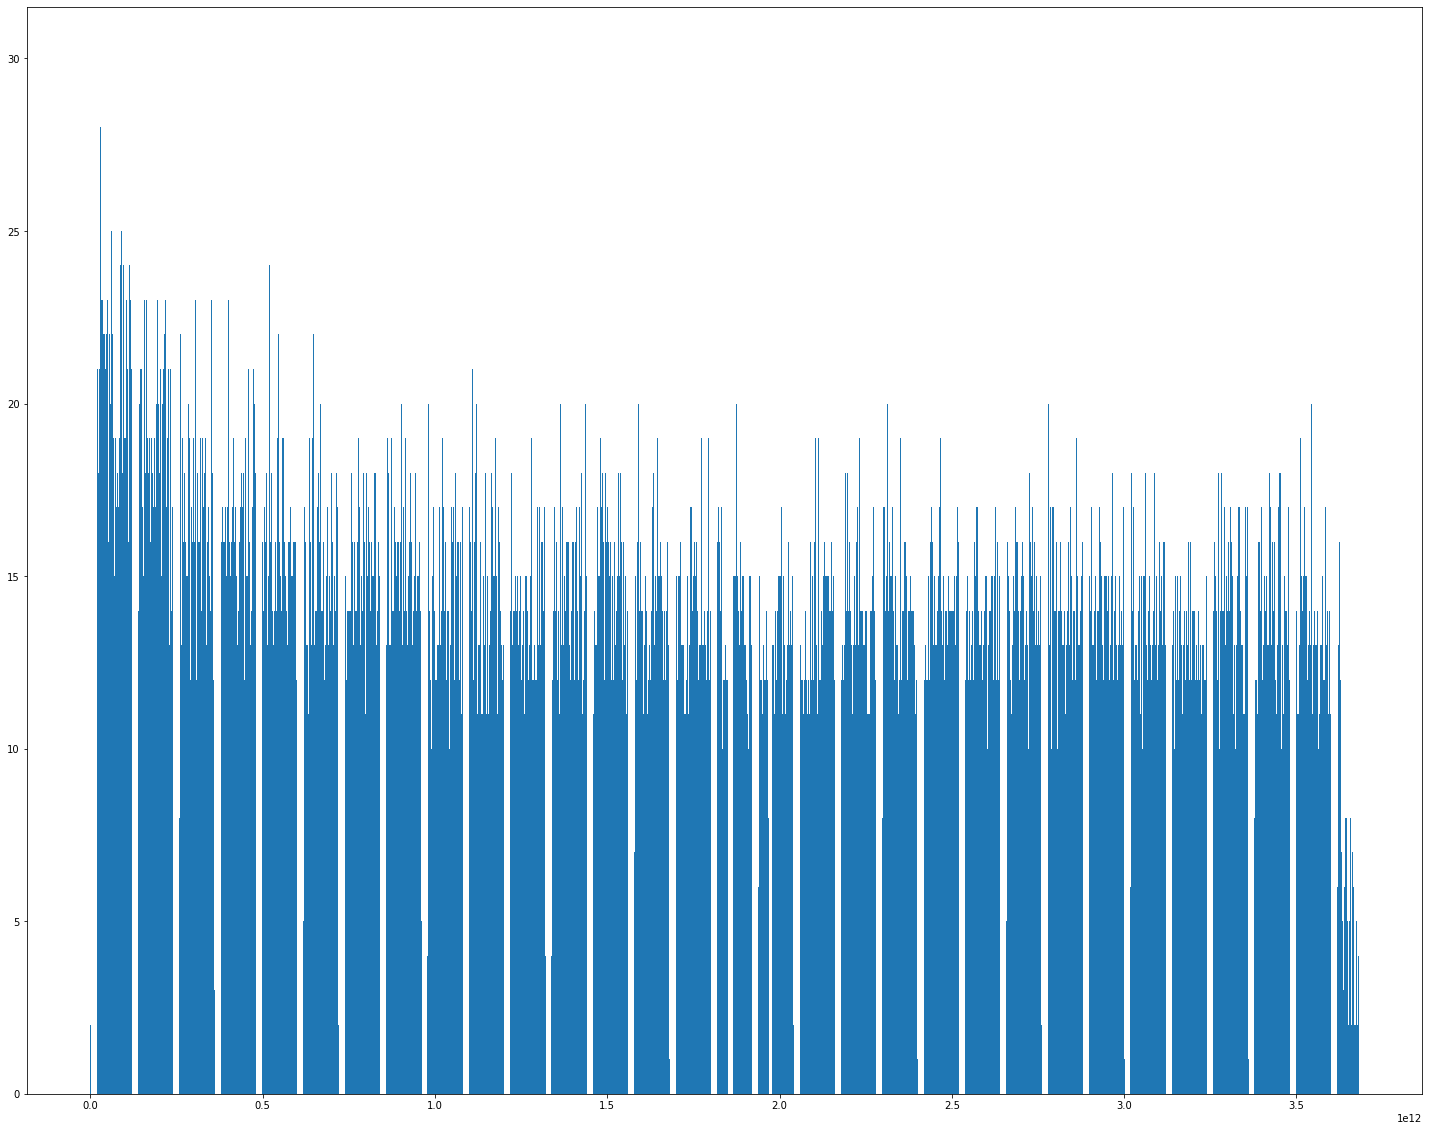

In [5]:
fig, ax = plt.subplots(figsize=(25, 20))
print(time_stamp[-1] / 1e9)
ax.hist(time_stamp, bins=int(time_stamp[-1]/1e9))

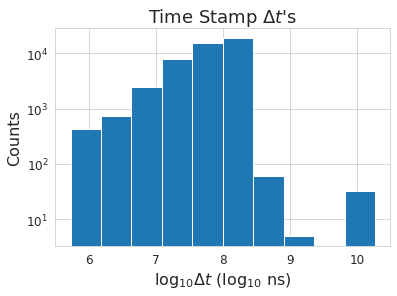

In [22]:
plt.hist(np.log10(time_stamp_delta_ts))
plt.yscale("log")
plt.title(r"Time Stamp $\Delta t$'s", fontsize=18)
plt.ylabel("Counts", fontsize=16)
plt.xlabel(r"$\log_{10}\Delta t$ ($\log_{10}$ ns)", fontsize=16)
plt.tick_params(labelsize=12)

In [50]:
flashers = [i for i in flashers if i not in range(24473, 25621 + 1)]

In [21]:
showers_and_noise = [i for i in events if i not in flashers and i not in range(24473, 25621 + 1)]
showers = [ev for ev in showers_and_noise if charge_mean[ev] > 500]

In [28]:
print(showers)

[0, 1, 2, 4, 6, 7, 10, 15, 17, 19, 21, 28, 35, 40, 44, 45, 49, 51, 56, 57, 58, 63, 65, 66, 67, 68, 71, 73, 75, 77, 79, 80, 82, 83, 86, 89, 95, 96, 97, 99, 100, 101, 103, 105, 108, 109, 117, 119, 121, 123, 125, 126, 127, 129, 130, 132, 134, 136, 138, 140, 143, 147, 149, 151, 154, 156, 157, 158, 162, 165, 169, 173, 175, 177, 182, 183, 185, 187, 188, 190, 192, 194, 197, 198, 200, 202, 205, 207, 208, 215, 218, 221, 223, 225, 226, 228, 230, 231, 237, 241, 242, 244, 246, 247, 248, 249, 250, 252, 254, 258, 262, 266, 268, 269, 271, 273, 276, 279, 281, 283, 287, 288, 291, 292, 293, 296, 297, 301, 303, 306, 310, 317, 322, 324, 327, 330, 331, 332, 334, 337, 338, 339, 349, 351, 353, 354, 359, 360, 361, 363, 365, 368, 370, 372, 374, 375, 376, 379, 380, 382, 383, 385, 386, 387, 390, 394, 395, 398, 399, 400, 405, 406, 408, 412, 416, 417, 420, 422, 425, 429, 430, 431, 433, 435, 437, 441, 442, 445, 447, 450, 451, 453, 456, 458, 462, 464, 465, 470, 473, 476, 477, 478, 481, 483, 485, 486, 488, 489, 494, 

In [35]:
width_off = [value for ev, value in enumerate(width) if ev < 24473 and ev in showers]
width_on = [value for ev, value in enumerate(width) if ev > 25621 and ev in showers]

length_off = [value for ev, value in enumerate(length) if ev < 24473 and ev in showers]
length_on = [value for ev, value in enumerate(length) if ev > 25621 and ev in showers]

miss_off = [value for ev, value in enumerate(miss) if ev < 24473 and ev in showers]
miss_on = [value for ev, value in enumerate(miss) if ev > 25621 and ev in showers]

dis_off = [value for ev, value in enumerate(dis) if ev < 24473 and ev in showers]
dis_on = [value for ev, value in enumerate(dis) if ev > 25621 and ev in showers]

azwidth_off = [value for ev, value in enumerate(azwidth) if ev < 24473 and ev in showers]
azwidth_on = [value for ev, value in enumerate(azwidth) if ev > 25621 and ev in showers]

alpha_off = np.arcsin(np.asarray(miss_off) / np.asarray(dis_off))
alpha_on = np.arcsin(np.asarray(miss_on) / np.asarray(dis_on))

10293
5971


Text(0.5, 0.98, 'Hillas Parameters (Shower Candidates) - Run 328538')

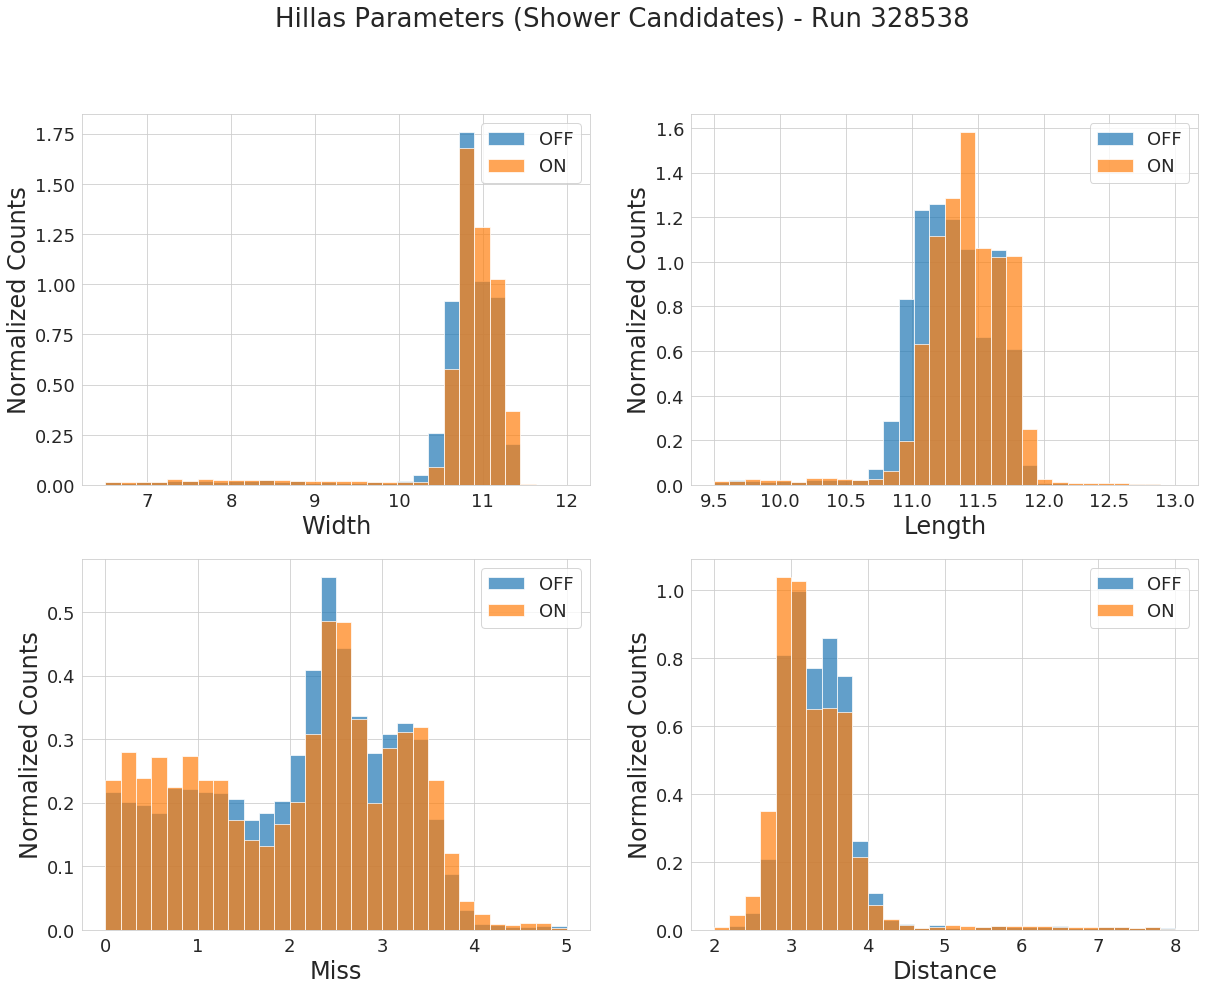

In [53]:
print(len(width_off))
print(len(width_on))

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
ax[0, 0].hist(width_off, bins=30, range=(6.5, 12.), alpha=0.7, density=True, label="OFF")
ax[0, 0].hist(width_on, bins=30, range=(6.5, 12.), alpha=0.7, density=True, label="ON")
ax[0, 0].set_xlabel("Width", fontsize=24)

ax[0, 1].hist(length_off, bins=30, range=(9.5, 13), alpha=0.7, label="OFF", density=True)
ax[0, 1].hist(length_on, bins=30, range=(9.5, 13), alpha=0.7, label="ON", density=True)
ax[0, 1].set_xlabel("Length", fontsize=24)

ax[1, 0].hist(miss_off, bins=30, range=(0, 5), alpha=0.7, label="OFF", density=True)
ax[1, 0].hist(miss_on, bins=30, range=(0, 5), alpha=0.7, label="ON", density=True)
ax[1, 0].set_xlabel("Miss", fontsize=24)

ax[1, 1].hist(dis_off, bins=30, range=(2, 8), alpha=0.7, label="OFF", density=True)
ax[1, 1].hist(dis_on, bins=30, range=(2, 8), alpha=0.7, label = "ON", density=True)
ax[1, 1].set_xlabel("Distance", fontsize=24)

for i in range(2):
    for j in range(2):
        ax[i, j].tick_params(labelsize=18)
        ax[i, j].set_ylabel("Normalized Counts", fontsize=24)
        ax[i, j].legend(fontsize=18)

fig.suptitle("Hillas Parameters (Shower Candidates) - Run 328538", fontsize=26)

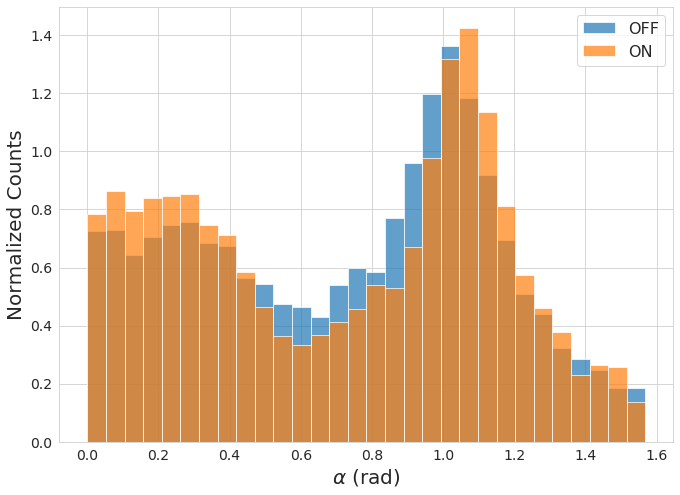

In [52]:
fig, ax = plt.subplots(figsize=(11,8))

ax.hist(alpha_off, bins=30, alpha=0.7, density=True, label="OFF")
ax.hist(alpha_on, bins=30, alpha=0.7, density=True, label="ON")
ax.set_xlabel(r"$\alpha$ (rad)", fontsize=20)
ax.set_ylabel("Normalized Counts", fontsize=20)
ax.legend(fontsize=16)
ax.tick_params(labelsize=14)

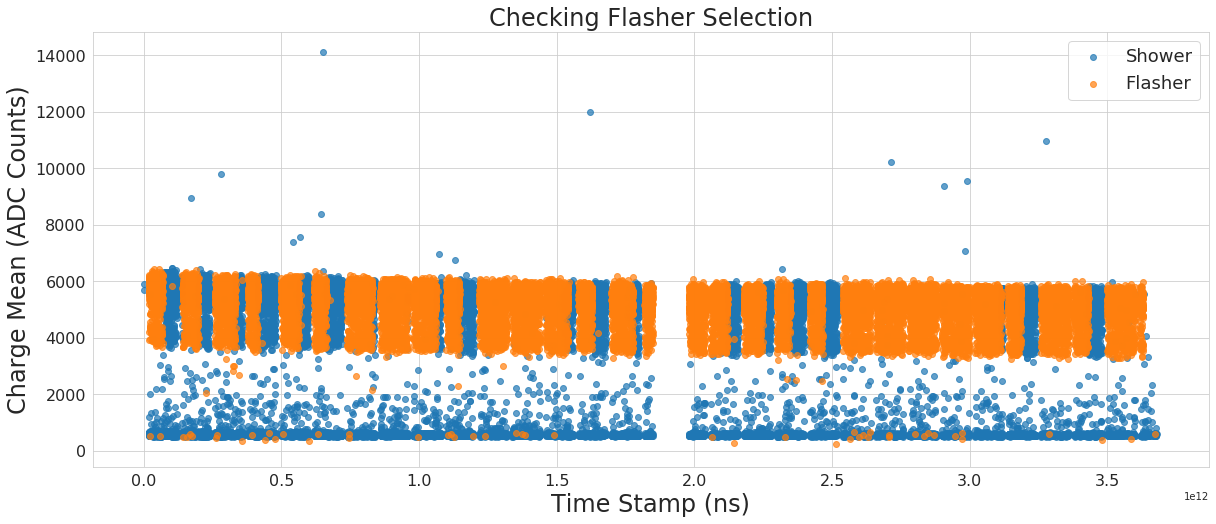

In [51]:
dfig, ax = plt.subplots(figsize=(20,8))
ax.scatter(time_stamp[showers], charge_mean[showers], alpha=0.7, label="Shower")
ax.scatter(time_stamp[flashers], charge_mean[flashers], alpha=0.7, label="Flasher")
ax.set_xlabel("Time Stamp (ns)", fontsize=24)
ax.set_ylabel("Charge Mean (ADC Counts)", fontsize=24)
ax.set_title("Checking Flasher Selection", fontsize=24)
ax.tick_params(labelsize=16)
ax.legend(fontsize=18)

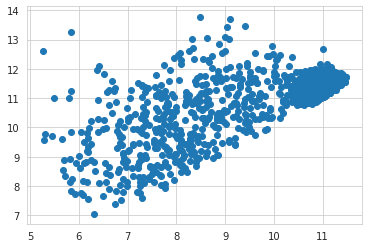

In [54]:
plt.scatter(width_on, length_on)

In [7]:
"""So moving forward here, can try looking at how cut effects run 326711 used to develop flasher id,
   look at charge mean histogram, look at time residue histogram, look at time residue scatter (no log, no abs),
   do more specific cut on noise events, do box cut on charge mean if nothing else works. fuck"""

'So moving forward here, can try looking at how cut effects run 326711 used to develop flasher id,\n   look at charge mean histogram, look at time residue histogram, look at time residue scatter (no log, no abs),\n   do more specific cut on noise events, do box cut on charge mean if nothing else works. fuck'

Initializing quicklook!
Trying to create save directory at: /data/wipac/CTA/target5and7data/runs_320000_through_329999/run328538
Pedestal database found!
Calibrated data found!
Performing flasher cut.
[0, 2, 1405, 2740, 3977, 5176, 6371, 7528, 8675, 9789, 10906, 12017, 13117, 14202, 15323, 16419, 17517, 18582, 19660, 20747, 21809, 22912, 23974, 25049, 26125, 27197, 28274, 29348, 30404, 31499, 32567, 32572, 32583, 32589, 32602, 32605, 32607, 32641, 32644, 32676, 32685, 32693, 32702, 32703, 32706, 32716, 32720, 32724, 32726, 32732, 32740, 32746, 32750, 32751, 32768, 32784, 32802, 32806, 32807, 32811, 32817, 32823, 32835, 32837, 32845, 32855, 32865, 32867, 32878, 32893, 32903, 32907, 32919, 32921, 32933, 32934, 32940, 32949, 32951, 32983, 32984, 32991, 32992, 32994, 33003]
33003
32566
3779.786183936


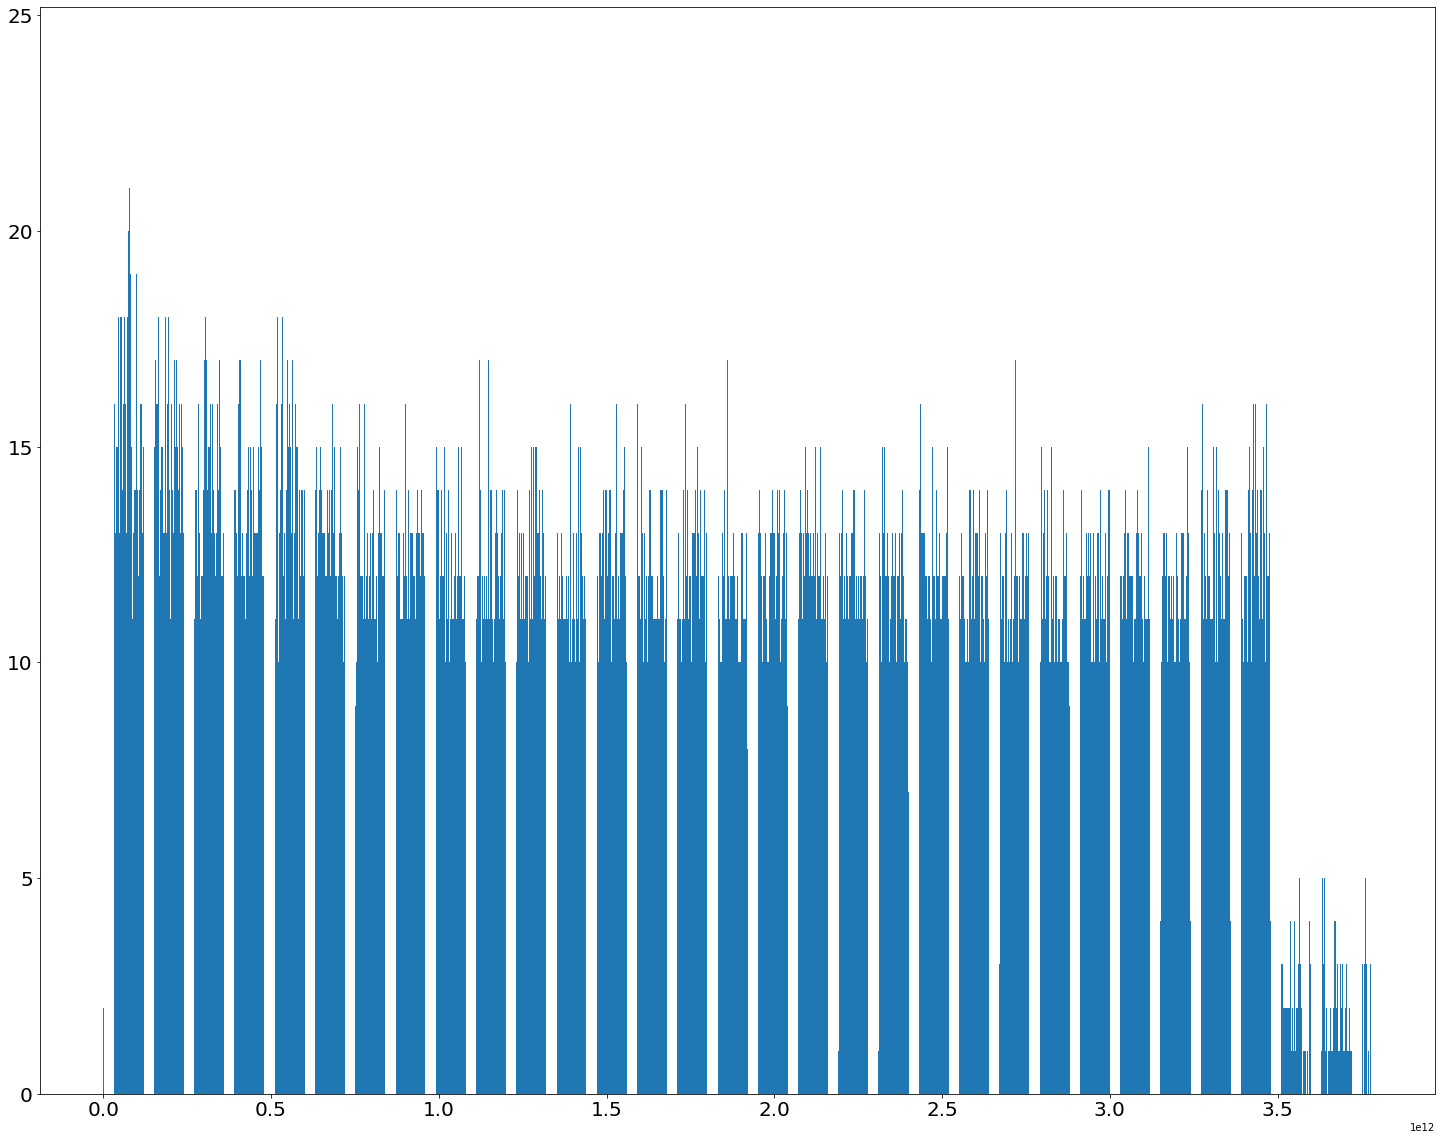

In [32]:
runID = 328538
pedID = 326709
mod_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 100, 103, 106, 107, 108, 111, 112, 114, 115, 119, 121, 123, 124, 125, 126]
datadir = "/data/wipac/CTA/target5and7data/runs_320000_through_329999"
savedir = f"{datadir}/run{runID}"
make = aq.Quicklooker(pedID, runID, mod_list, datadir, savedir)

rate = 10. # Hz
flashers = make.flasher_cuts(rate)

datafile = f"/data/wipac/CTA/target5and7data/runs_320000_through_329999/run{runID}/event_stats_run{runID}.txt"

events, time_s, time_ns, charge_max, \
charge_mean, charge_std, p2p_max, \
p2p_mean, p2p_std, width, length, miss, dis, azwidth = np.loadtxt(datafile, delimiter=", ", skiprows=1, unpack=True)

events = events.astype("int")
time_s *= 10**9
time_stamp = time_s + time_ns
time_stamp -= time_stamp[0]

time_stamp_delta_ts = [j - i for i, j in zip(time_stamp[:-1], time_stamp[1:])]
print(len(events))
print(np.asarray(time_stamp_delta_ts).argmax())

fig, ax = plt.subplots(figsize=(25, 20))
print(time_stamp[-1] / 1e9)
ax.hist(time_stamp, bins=int(time_stamp[-1]/1e9))
ax.tick_params(labelsize=20)

In [33]:
showers = [i for i in events if charge_mean[i] > 750 and i not in flashers]

width_off_2 = [value for ev, value in enumerate(width) if ev < 16419 and ev in showers]
width_on_2 = [value for ev, value in enumerate(width) if ev > 19660 and ev in showers]

length_off_2 = [value for ev, value in enumerate(length) if ev < 16419 and ev in showers]
length_on_2 = [value for ev, value in enumerate(length) if ev > 19660 and ev in showers]

miss_off_2 = [value for ev, value in enumerate(miss) if ev < 16419 and ev in showers]
miss_on_2 = [value for ev, value in enumerate(miss) if ev > 19660 and ev in showers]

dis_off_2 = [value for ev, value in enumerate(dis) if ev < 16419 and ev in showers]
dis_on_2 = [value for ev, value in enumerate(dis) if ev > 19660 and ev in showers]

azwidth_off_2 = [value for ev, value in enumerate(azwidth) if ev < 16419 and ev in showers]
azwidth_on_2 = [value for ev, value in enumerate(azwidth) if ev > 19660 and ev in showers]

alpha_off_2 = np.arcsin(np.asarray(miss_off_2) / np.asarray(dis_off_2))
alpha_on_2 = np.arcsin(np.asarray(miss_on_2) / np.asarray(dis_on_2))

Text(0.5, 0.98, 'Hillas Parameters (Shower Candidates) - Run 328538')

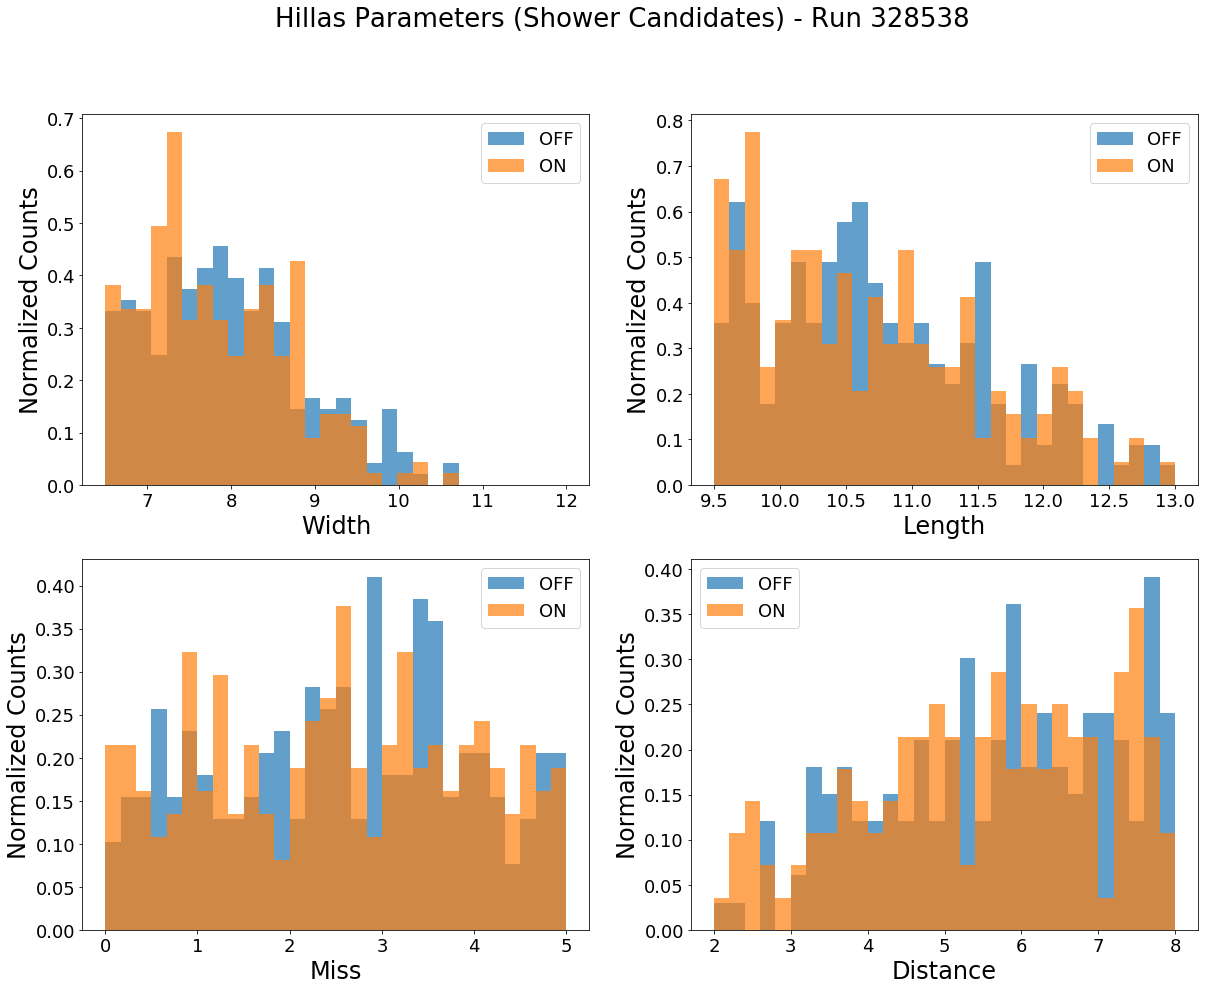

In [34]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
ax[0, 0].hist(width_off_2, bins=30, range=(6.5, 12.), alpha=0.7, density=True, label="OFF")
ax[0, 0].hist(width_on_2, bins=30, range=(6.5, 12.), alpha=0.7, density=True, label="ON")
ax[0, 0].set_xlabel("Width", fontsize=24)

ax[0, 1].hist(length_off_2, bins=30, range=(9.5, 13), alpha=0.7, label="OFF", density=True)
ax[0, 1].hist(length_on_2, bins=30, range=(9.5, 13), alpha=0.7, label="ON", density=True)
ax[0, 1].set_xlabel("Length", fontsize=24)

ax[1, 0].hist(miss_off_2, bins=30, range=(0, 5), alpha=0.7, label="OFF", density=True)
ax[1, 0].hist(miss_on_2, bins=30, range=(0, 5), alpha=0.7, label="ON", density=True)
ax[1, 0].set_xlabel("Miss", fontsize=24)

ax[1, 1].hist(dis_off_2, bins=30, range=(2, 8), alpha=0.7, label="OFF", density=True)
ax[1, 1].hist(dis_on_2, bins=30, range=(2, 8), alpha=0.7, label = "ON", density=True)
ax[1, 1].set_xlabel("Distance", fontsize=24)

for i in range(2):
    for j in range(2):
        ax[i, j].tick_params(labelsize=18)
        ax[i, j].set_ylabel("Normalized Counts", fontsize=24)
        ax[i, j].legend(fontsize=18)

fig.suptitle("Hillas Parameters (Shower Candidates) - Run 328538", fontsize=26)

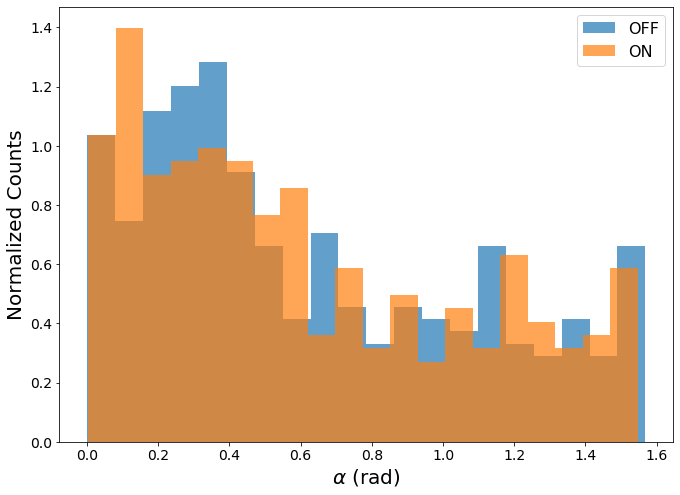

In [35]:
fig, ax = plt.subplots(figsize=(11,8))

ax.hist(alpha_off_2, bins=20, alpha=0.7, density=True, label="OFF")
ax.hist(alpha_on_2, bins=20, alpha=0.7, density=True, label="ON")
ax.set_xlabel(r"$\alpha$ (rad)", fontsize=20)
ax.set_ylabel("Normalized Counts", fontsize=20)
ax.legend(fontsize=16)
ax.tick_params(labelsize=14)

Text(0.5, 0.98, 'Run 328538')

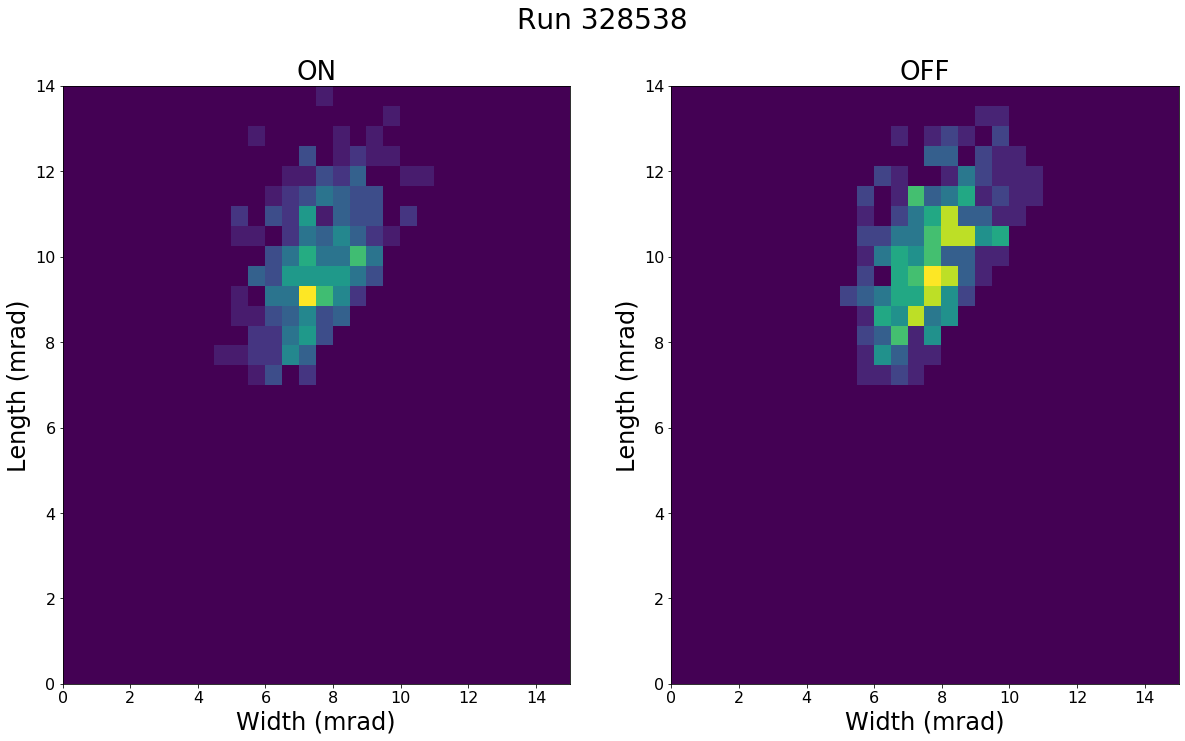

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 11))

ax[0].hist2d(width_on_2, length_on_2, bins=30, range=[[0, 15], [0, 14]], cmap="viridis", density=True)
ax[1].hist2d(width_off_2, length_off_2, bins=30, range=[[0, 15], [0, 14]], cmap="viridis", density=True)
ax[0].set_xlim(0, 15)
ax[0].set_ylim(0, 14)
ax[1].set_xlim(0, 15)
ax[1].set_ylim(0, 14)
ax[0].set_title("ON", fontsize=26)
ax[1].set_title("OFF", fontsize=26)
for i in range(2):
    ax[i].set_xlabel("Width (mrad)", fontsize=24)
    ax[i].set_ylabel("Length (mrad)", fontsize=24)
    ax[i].tick_params(labelsize=16)
fig.suptitle("Run 328538", fontsize=28)

Initializing quicklook!
Trying to create save directory at: /data/wipac/CTA/target5and7data/runs_320000_through_329999/run328540
Pedestal database found!
Calibrated data found!
Performing flasher cut.
[0, 1, 1539, 2991, 4353, 5683, 6952, 8166, 9424, 10648, 11876, 13076, 14287, 15491, 16709, 17914, 19102, 20136, 20205, 21410, 22603, 23792, 24968, 26143, 27319, 28455, 29611, 30764, 31939, 33120, 34293, 35422, 35502, 35503, 35504, 35509, 35511, 35513, 35523, 35526, 35527, 35528, 35529, 35531, 35532, 35533, 35535, 35536, 35542, 35550, 35556, 35558, 35572, 35577, 35579, 35582, 35583, 35593, 35599, 35621, 35626, 35630, 35634, 35635, 35638, 35642, 35650, 35651, 35653, 35670, 35671, 35677, 35683, 35685, 35686, 35689, 35692, 35699, 35700, 35702, 35703, 35704, 35708, 35713, 35714, 35715, 35717, 35725, 35726, 35730, 35732, 35740, 35742, 35745, 35746, 35747, 35749, 35751, 35753, 35757, 35759, 35763, 35768, 35769, 35771, 35774, 35790, 35795, 35796, 35799, 35805, 35814, 35822, 35824]
35824
35758
377

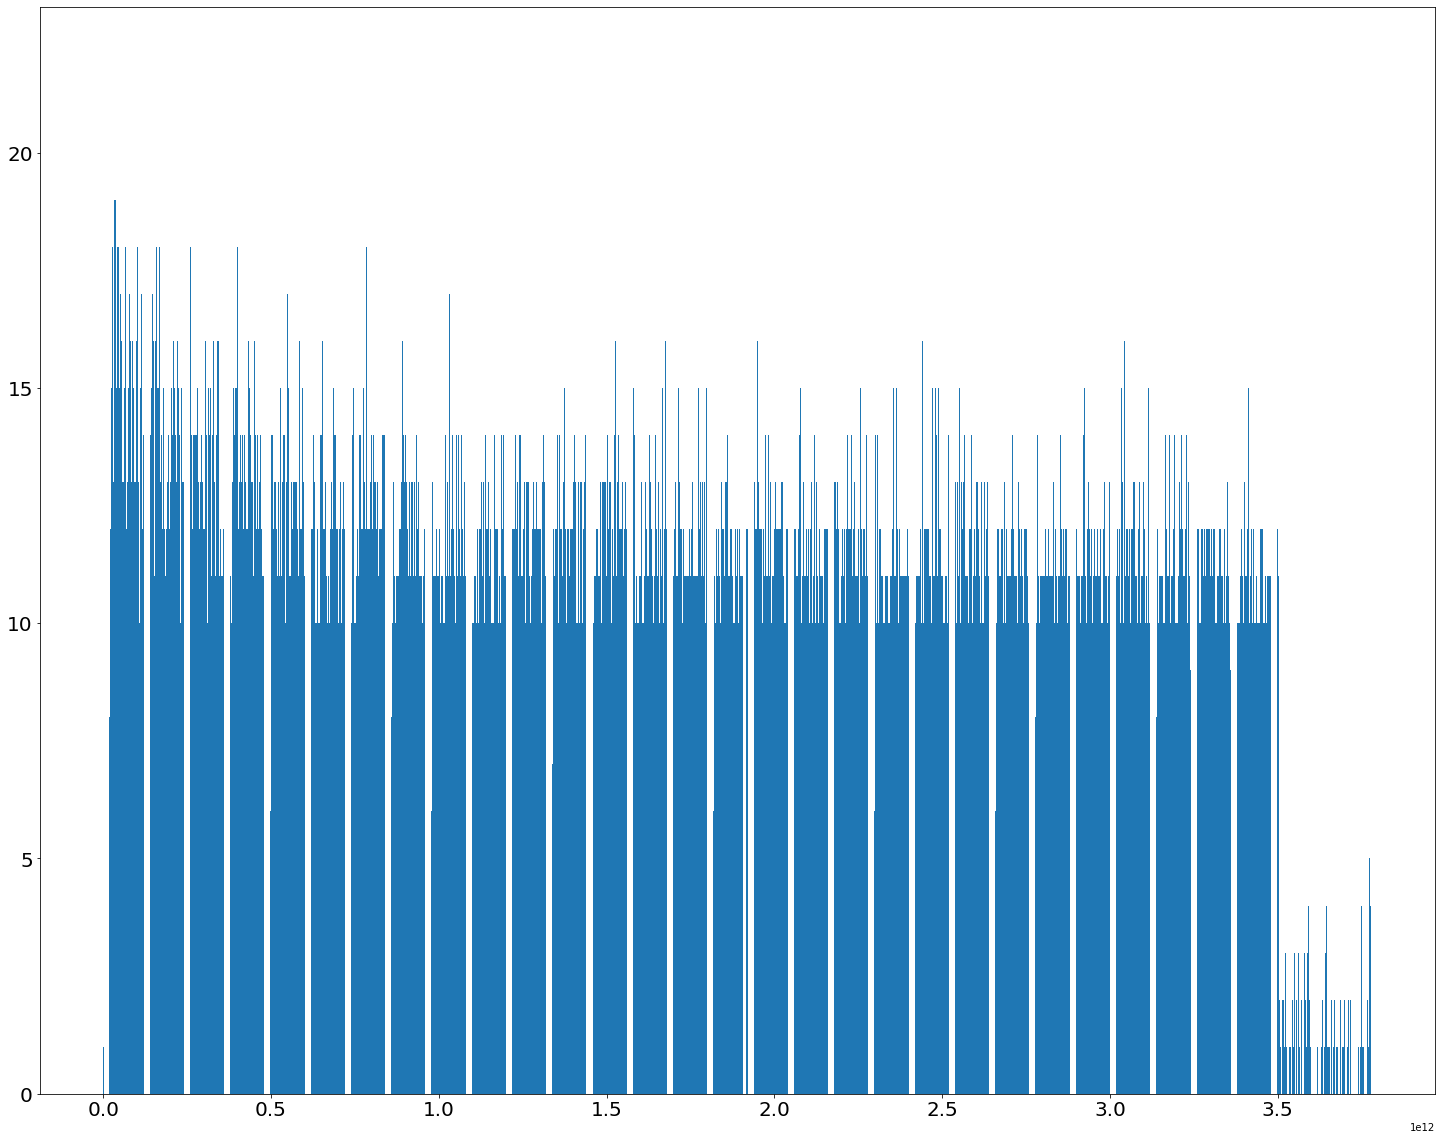

In [37]:
runID = 328540
pedID = 326709
mod_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 100, 103, 106, 107, 108, 111, 112, 114, 115, 119, 121, 123, 124, 125, 126]
datadir = "/data/wipac/CTA/target5and7data/runs_320000_through_329999"
savedir = f"{datadir}/run{runID}"
make = aq.Quicklooker(pedID, runID, mod_list, datadir, savedir)

rate = 10. # Hz
flashers = make.flasher_cuts(rate)

datafile = f"/data/wipac/CTA/target5and7data/runs_320000_through_329999/run{runID}/event_stats_run{runID}.txt"

events, time_s, time_ns, charge_max, \
charge_mean, charge_std, p2p_max, \
p2p_mean, p2p_std, width, length, miss, dis, azwidth = np.loadtxt(datafile, delimiter=", ", skiprows=1, unpack=True)

events = events.astype("int")
time_s *= 10**9
time_stamp = time_s + time_ns
time_stamp -= time_stamp[0]

time_stamp_delta_ts = [j - i for i, j in zip(time_stamp[:-1], time_stamp[1:])]
print(len(events))
print(np.asarray(time_stamp_delta_ts).argmax())

fig, ax = plt.subplots(figsize=(25, 20))
print(time_stamp[-1] / 1e9)
ax.hist(time_stamp, bins=int(time_stamp[-1]/1e9))
ax.tick_params(labelsize=20)

In [38]:
showers = [i for i in events if charge_mean[i] > 750 and i not in flashers]

width_on_3 = [value for ev, value in enumerate(width) if ev < 19102 and ev in showers]
width_off_3 = [value for ev, value in enumerate(width) if ev > 21410 and ev in showers]

length_on_3 = [value for ev, value in enumerate(length) if ev < 19102 and ev in showers]
length_off_3 = [value for ev, value in enumerate(length) if ev > 21410 and ev in showers]

miss_on_3 = [value for ev, value in enumerate(miss) if ev < 19102 and ev in showers]
miss_off_3 = [value for ev, value in enumerate(miss) if ev > 21410 and ev in showers]

dis_on_3 = [value for ev, value in enumerate(dis) if ev < 19102 and ev in showers]
dis_off_3 = [value for ev, value in enumerate(dis) if ev > 21410 and ev in showers]

azwidth_on_3 = [value for ev, value in enumerate(azwidth) if ev < 19102 and ev in showers]
azwidth_off_3 = [value for ev, value in enumerate(azwidth) if ev > 21410 and ev in showers]

alpha_off_3 = np.arcsin(np.asarray(miss_off_3) / np.asarray(dis_off_3))
alpha_on_3 = np.arcsin(np.asarray(miss_on_3) / np.asarray(dis_on_3))

Text(0.5, 0.98, 'Hillas Parameters (Shower Candidates) - Run 328538')

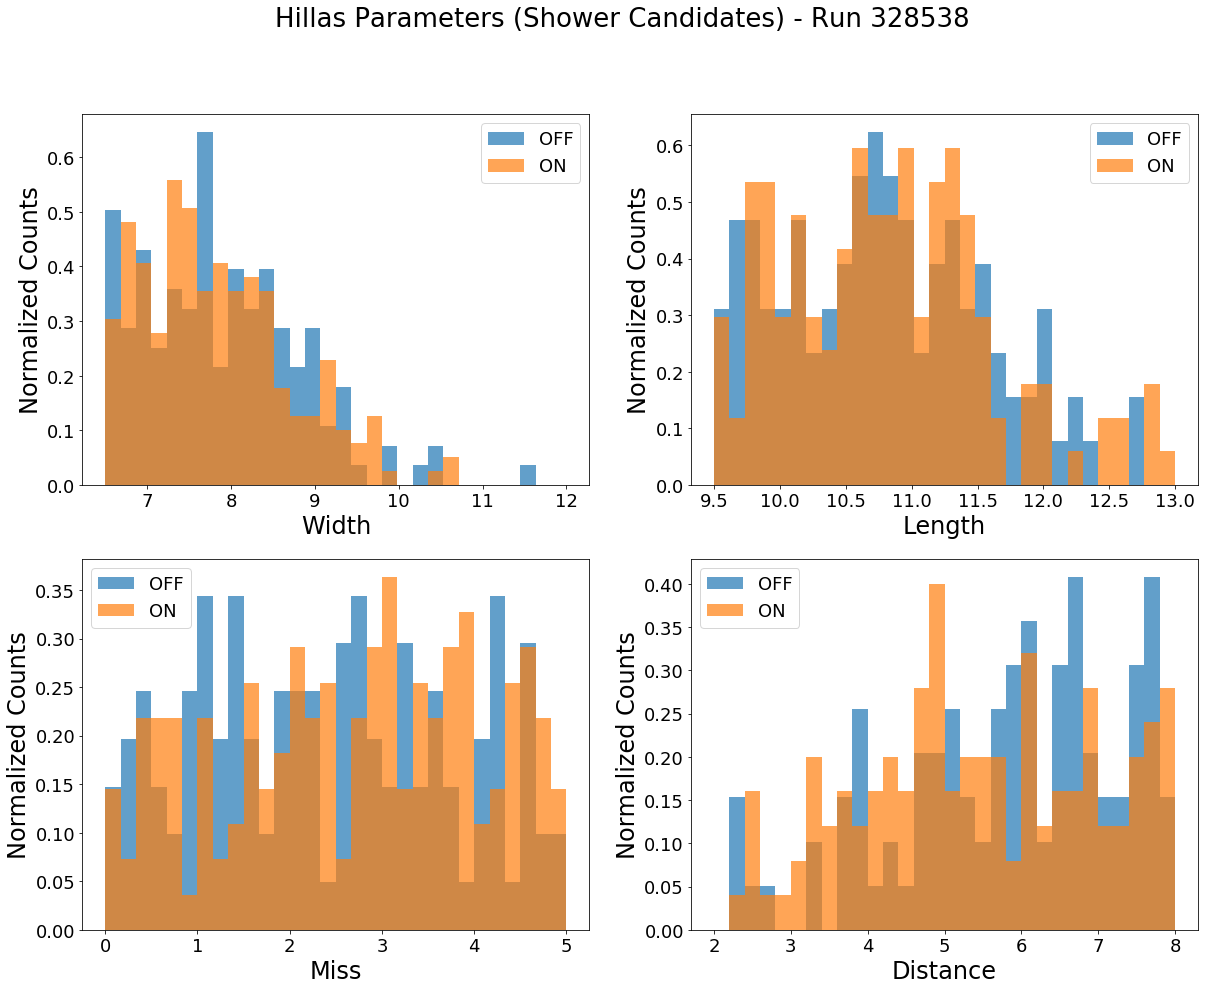

In [39]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
ax[0, 0].hist(width_off_3, bins=30, range=(6.5, 12.), alpha=0.7, density=True, label="OFF")
ax[0, 0].hist(width_on_3, bins=30, range=(6.5, 12.), alpha=0.7, density=True, label="ON")
ax[0, 0].set_xlabel("Width", fontsize=24)

ax[0, 1].hist(length_off_3, bins=30, range=(9.5, 13), alpha=0.7, label="OFF", density=True)
ax[0, 1].hist(length_on_3, bins=30, range=(9.5, 13), alpha=0.7, label="ON", density=True)
ax[0, 1].set_xlabel("Length", fontsize=24)

ax[1, 0].hist(miss_off_3, bins=30, range=(0, 5), alpha=0.7, label="OFF", density=True)
ax[1, 0].hist(miss_on_3, bins=30, range=(0, 5), alpha=0.7, label="ON", density=True)
ax[1, 0].set_xlabel("Miss", fontsize=24)

ax[1, 1].hist(dis_off_3, bins=30, range=(2, 8), alpha=0.7, label="OFF", density=True)
ax[1, 1].hist(dis_on_3, bins=30, range=(2, 8), alpha=0.7, label = "ON", density=True)
ax[1, 1].set_xlabel("Distance", fontsize=24)

for i in range(2):
    for j in range(2):
        ax[i, j].tick_params(labelsize=18)
        ax[i, j].set_ylabel("Normalized Counts", fontsize=24)
        ax[i, j].legend(fontsize=18)

fig.suptitle("Hillas Parameters (Shower Candidates) - Run 328538", fontsize=26)

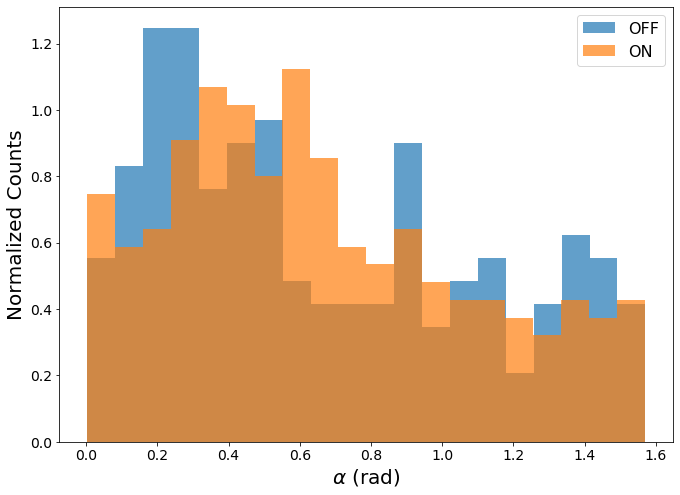

In [40]:
fig, ax = plt.subplots(figsize=(11,8))

ax.hist(alpha_off_3, bins=20, alpha=0.7, density=True, label="OFF")
ax.hist(alpha_on_3, bins=20, alpha=0.7, density=True, label="ON")
ax.set_xlabel(r"$\alpha$ (rad)", fontsize=20)
ax.set_ylabel("Normalized Counts", fontsize=20)
ax.legend(fontsize=16)
ax.tick_params(labelsize=14)

Text(0.5, 0.98, 'Run 328540')

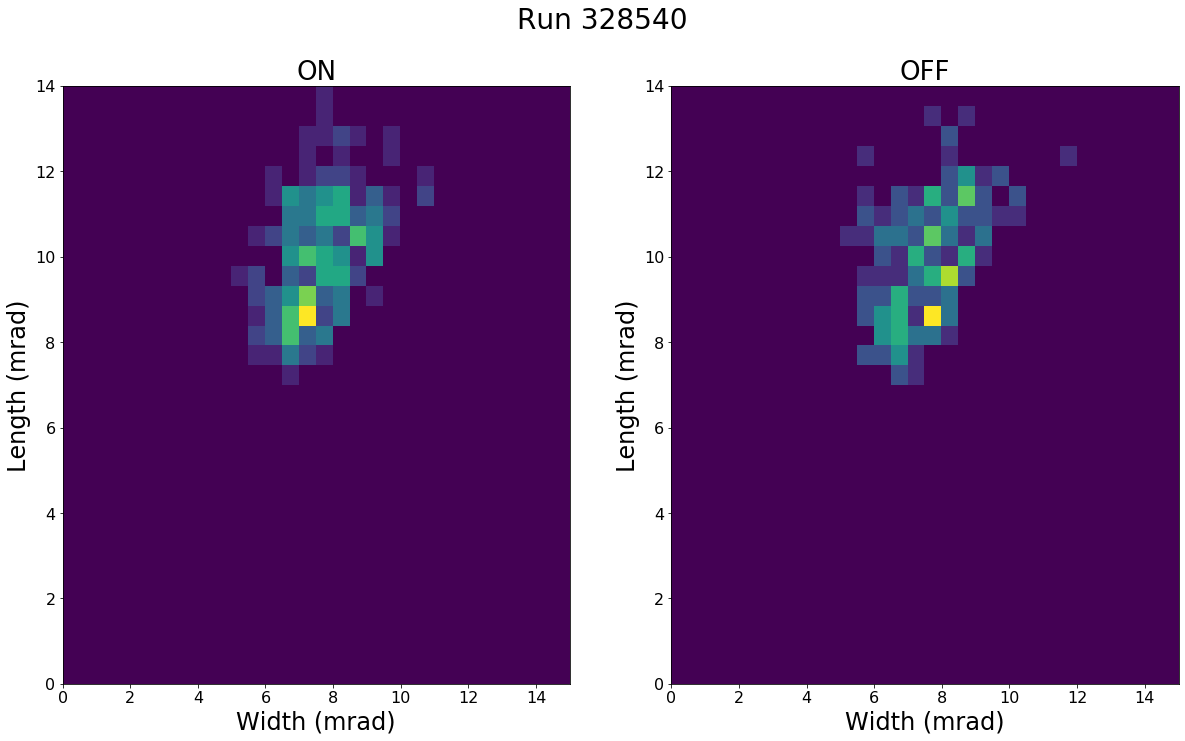

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 11))

ax[0].hist2d(width_on_3, length_on_3, bins=30, range=[[0, 15], [0, 14]], cmap="viridis", density=True)
ax[1].hist2d(width_off_3, length_off_3, bins=30, range=[[0, 15], [0, 14]], cmap="viridis", density=True)
ax[0].set_xlim(0, 15)
ax[0].set_ylim(0, 14)
ax[1].set_xlim(0, 15)
ax[1].set_ylim(0, 14)
ax[0].set_title("ON", fontsize=26)
ax[1].set_title("OFF", fontsize=26)
for i in range(2):
    ax[i].set_xlabel("Width (mrad)", fontsize=24)
    ax[i].set_ylabel("Length (mrad)", fontsize=24)
    ax[i].tick_params(labelsize=16)
fig.suptitle("Run 328538", fontsize=28)

Initializing quicklook!
Trying to create save directory at: /data/wipac/CTA/target5and7data/runs_320000_through_329999/run328536
Pedestal database found!
Calibrated data found!
Performing flasher cut.
[0, 2, 2114, 3993, 5739, 7414, 9025, 10616, 12163, 13703, 15211, 16714, 18223, 19735, 21219, 22629, 24054, 24473, 25240, 25621, 26444, 27878, 29300, 30735, 32177, 33615, 35072, 36506, 37935, 39354, 40741, 42165, 43607, 45005, 45371, 45382]
45382
37934
3680.123775232


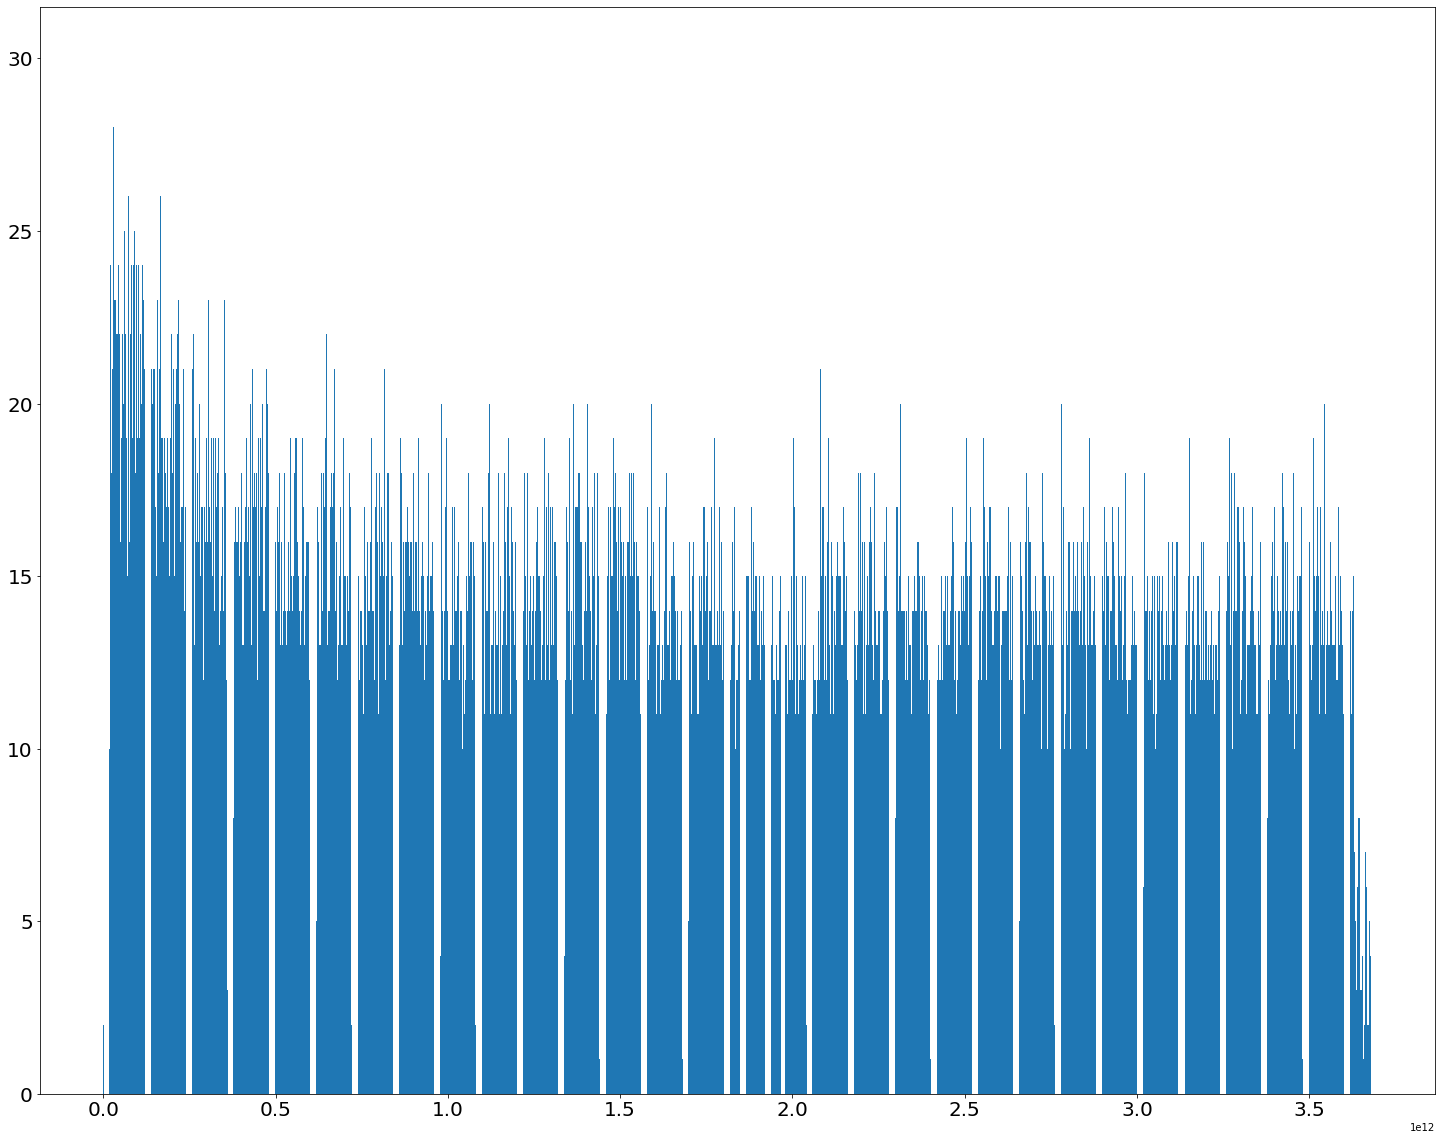

In [42]:
runID = 328536
pedID = 326709
mod_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 100, 103, 106, 107, 108, 111, 112, 114, 115, 119, 121, 123, 124, 125, 126]
datadir = "/data/wipac/CTA/target5and7data/runs_320000_through_329999"
savedir = f"{datadir}/run{runID}"
make = aq.Quicklooker(pedID, runID, mod_list, datadir, savedir)

rate = 10. # Hz
flashers = make.flasher_cuts(rate)

datafile = f"/data/wipac/CTA/target5and7data/runs_320000_through_329999/run{runID}/event_stats_run{runID}.txt"

events, time_s, time_ns, charge_max, \
charge_mean, charge_std, p2p_max, \
p2p_mean, p2p_std, width, length, miss, dis, azwidth = np.loadtxt(datafile, delimiter=", ", skiprows=1, unpack=True)

events = events.astype("int")
time_s *= 10**9
time_stamp = time_s + time_ns
time_stamp -= time_stamp[0]

time_stamp_delta_ts = [j - i for i, j in zip(time_stamp[:-1], time_stamp[1:])]
print(len(events))
print(np.asarray(time_stamp_delta_ts).argmax())

fig, ax = plt.subplots(figsize=(25, 20))
print(time_stamp[-1] / 1e9)
ax.hist(time_stamp, bins=int(time_stamp[-1]/1e9))
ax.tick_params(labelsize=20)

In [43]:
showers = [i for i in events if charge_mean[i] > 750 and i not in flashers]

width_off_1 = [value for ev, value in enumerate(width) if ev < 24473 and ev in showers]
width_on_1 = [value for ev, value in enumerate(width) if ev > 25621 and ev in showers]

length_off_1 = [value for ev, value in enumerate(length) if ev < 24473 and ev in showers]
length_on_1 = [value for ev, value in enumerate(length) if ev > 25621 and ev in showers]

miss_off_1 = [value for ev, value in enumerate(miss) if ev < 24473 and ev in showers]
miss_on_1 = [value for ev, value in enumerate(miss) if ev > 25621 and ev in showers]

dis_off_1 = [value for ev, value in enumerate(dis) if ev < 24473 and ev in showers]
dis_on_1 = [value for ev, value in enumerate(dis) if ev > 25621 and ev in showers]

azwidth_off_1 = [value for ev, value in enumerate(azwidth) if ev < 24473 and ev in showers]
azwidth_on_1 = [value for ev, value in enumerate(azwidth) if ev > 25621 and ev in showers]

alpha_off_1 = np.arcsin(np.asarray(miss_off_1) / np.asarray(dis_off_1))
alpha_on_1 = np.arcsin(np.asarray(miss_on_1) / np.asarray(dis_on_1))

Text(0.5, 0.98, 'Hillas Parameters (Shower Candidates) - Run 328536')

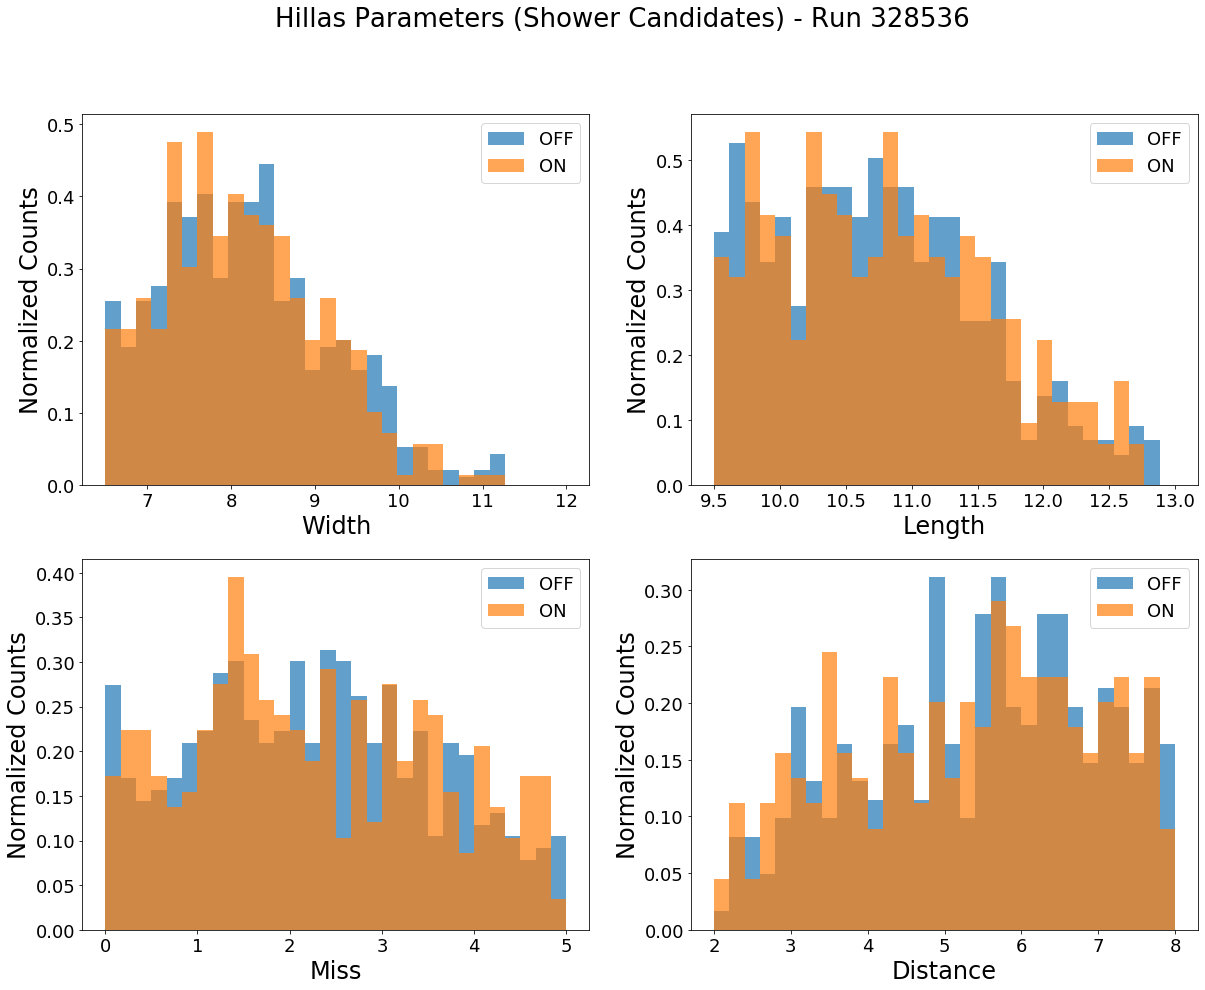

In [44]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
ax[0, 0].hist(width_off_1, bins=30, range=(6.5, 12.), alpha=0.7, density=True, label="OFF")
ax[0, 0].hist(width_on_1, bins=30, range=(6.5, 12.), alpha=0.7, density=True, label="ON")
ax[0, 0].set_xlabel("Width", fontsize=24)

ax[0, 1].hist(length_off_1, bins=30, range=(9.5, 13), alpha=0.7, label="OFF", density=True)
ax[0, 1].hist(length_on_1, bins=30, range=(9.5, 13), alpha=0.7, label="ON", density=True)
ax[0, 1].set_xlabel("Length", fontsize=24)

ax[1, 0].hist(miss_off_1, bins=30, range=(0, 5), alpha=0.7, label="OFF", density=True)
ax[1, 0].hist(miss_on_1, bins=30, range=(0, 5), alpha=0.7, label="ON", density=True)
ax[1, 0].set_xlabel("Miss", fontsize=24)

ax[1, 1].hist(dis_off_1, bins=30, range=(2, 8), alpha=0.7, label="OFF", density=True)
ax[1, 1].hist(dis_on_1, bins=30, range=(2, 8), alpha=0.7, label = "ON", density=True)
ax[1, 1].set_xlabel("Distance", fontsize=24)

for i in range(2):
    for j in range(2):
        ax[i, j].tick_params(labelsize=18)
        ax[i, j].set_ylabel("Normalized Counts", fontsize=24)
        ax[i, j].legend(fontsize=18)

fig.suptitle("Hillas Parameters (Shower Candidates) - Run 328540", fontsize=26)

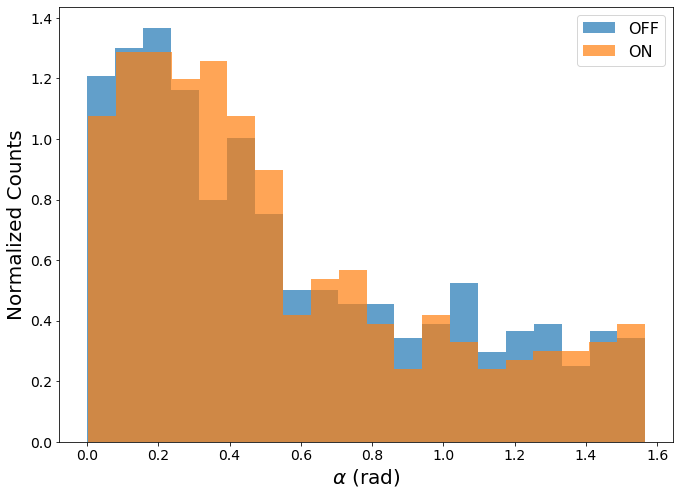

In [45]:
fig, ax = plt.subplots(figsize=(11,8))

ax.hist(alpha_off_1, bins=20, alpha=0.7, density=True, label="OFF")
ax.hist(alpha_on_1, bins=20, alpha=0.7, density=True, label="ON")
ax.set_xlabel(r"$\alpha$ (rad)", fontsize=20)
ax.set_ylabel("Normalized Counts", fontsize=20)
ax.legend(fontsize=16)
ax.tick_params(labelsize=14)

Text(0.5, 0.98, 'Run 328540')

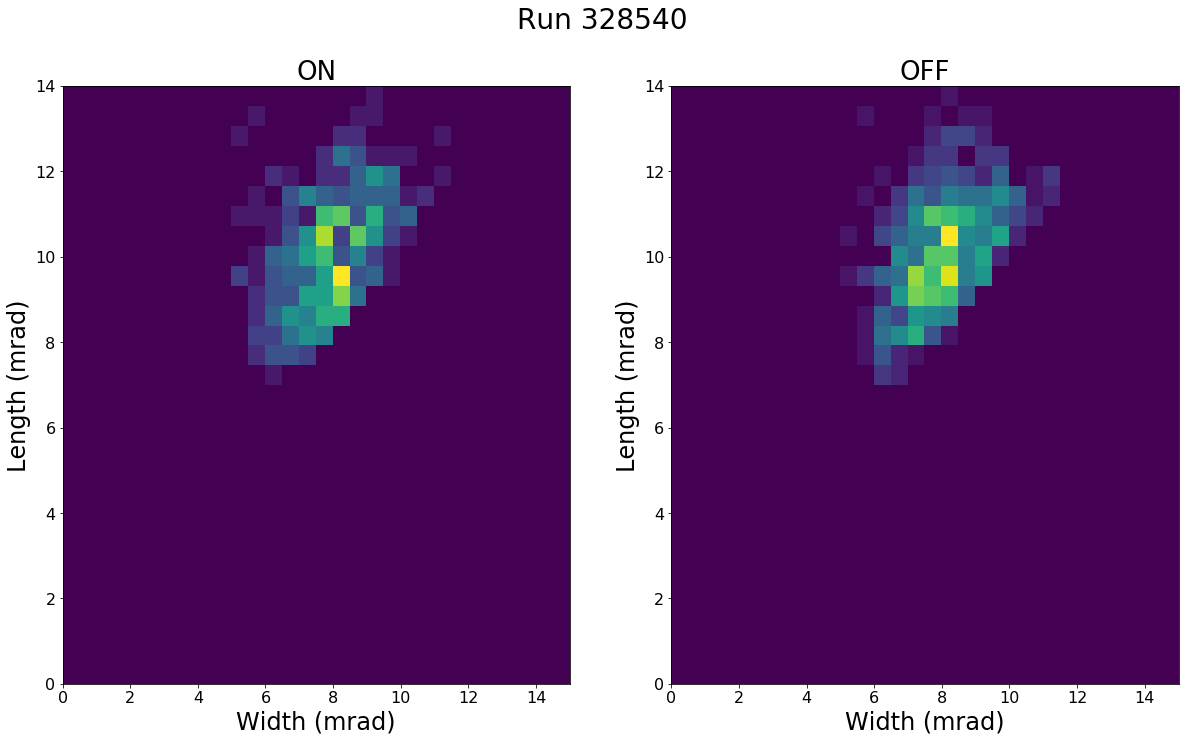

In [46]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 11))

ax[0].hist2d(width_on_1, length_on_1, bins=30, range=[[0, 15], [0, 14]], cmap="viridis", density=True)
ax[1].hist2d(width_off_1, length_off_1, bins=30, range=[[0, 15], [0, 14]], cmap="viridis", density=True)
ax[0].set_xlim(0, 15)
ax[0].set_ylim(0, 14)
ax[1].set_xlim(0, 15)
ax[1].set_ylim(0, 14)
ax[0].set_title("ON", fontsize=26)
ax[1].set_title("OFF", fontsize=26)
for i in range(2):
    ax[i].set_xlabel("Width (mrad)", fontsize=24)
    ax[i].set_ylabel("Length (mrad)", fontsize=24)
    ax[i].tick_params(labelsize=16)
fig.suptitle("Run 328540", fontsize=28)

In [49]:
width_on_list = [width_on_1, width_on_2, width_on_3]
width_on = [width for sublist in width_on_list for width in sublist]

length_on_list = [length_on_1, length_on_2, length_on_3]
length_on = [length for sublist in length_on_list for length in sublist]

miss_on_list = [miss_on_1, miss_on_2, miss_on_3]
miss_on = [miss for sublist in miss_on_list for miss in sublist]

dis_on_list = [dis_on_1, dis_on_2, dis_on_3]
dis_on = [dis for sublist in dis_on_list for dis in sublist]

azwidth_on_list = [azwidth_on_1, azwidth_on_2, azwidth_on_3]
azwidth_on = [azwidth for sublist in azwidth_on_list for azwidth in sublist]

alpha_on_list = [alpha_on_1, alpha_on_2, alpha_on_3]
alpha_on = [alpha for sublist in alpha_on_list for alpha in sublist]



width_off_list = [width_off_1, width_off_2, width_off_3]
width_off = [width for sublist in width_off_list for width in sublist]

length_off_list = [length_off_1, length_off_2, length_off_3]
length_off = [length for sublist in length_off_list for length in sublist]

miss_off_list = [miss_off_1, miss_off_2, miss_off_3]
miss_off = [miss for sublist in miss_off_list for miss in sublist]

dis_off_list = [dis_off_1, dis_off_2, dis_off_3]
dis_off = [dis for sublist in dis_off_list for dis in sublist]

azwidth_off_list = [azwidth_off_1, azwidth_off_2, azwidth_off_3]
azwidth_off = [azwidth for sublist in azwidth_off_list for azwidth in sublist]

alpha_off_list = [alpha_off_1, alpha_off_2, alpha_off_3]
alpha_off = [alpha for sublist in alpha_off_list for alpha in sublist]

Text(0.5, 0.98, 'Hillas Parameters (Shower Candidates) - All Crab Runs')

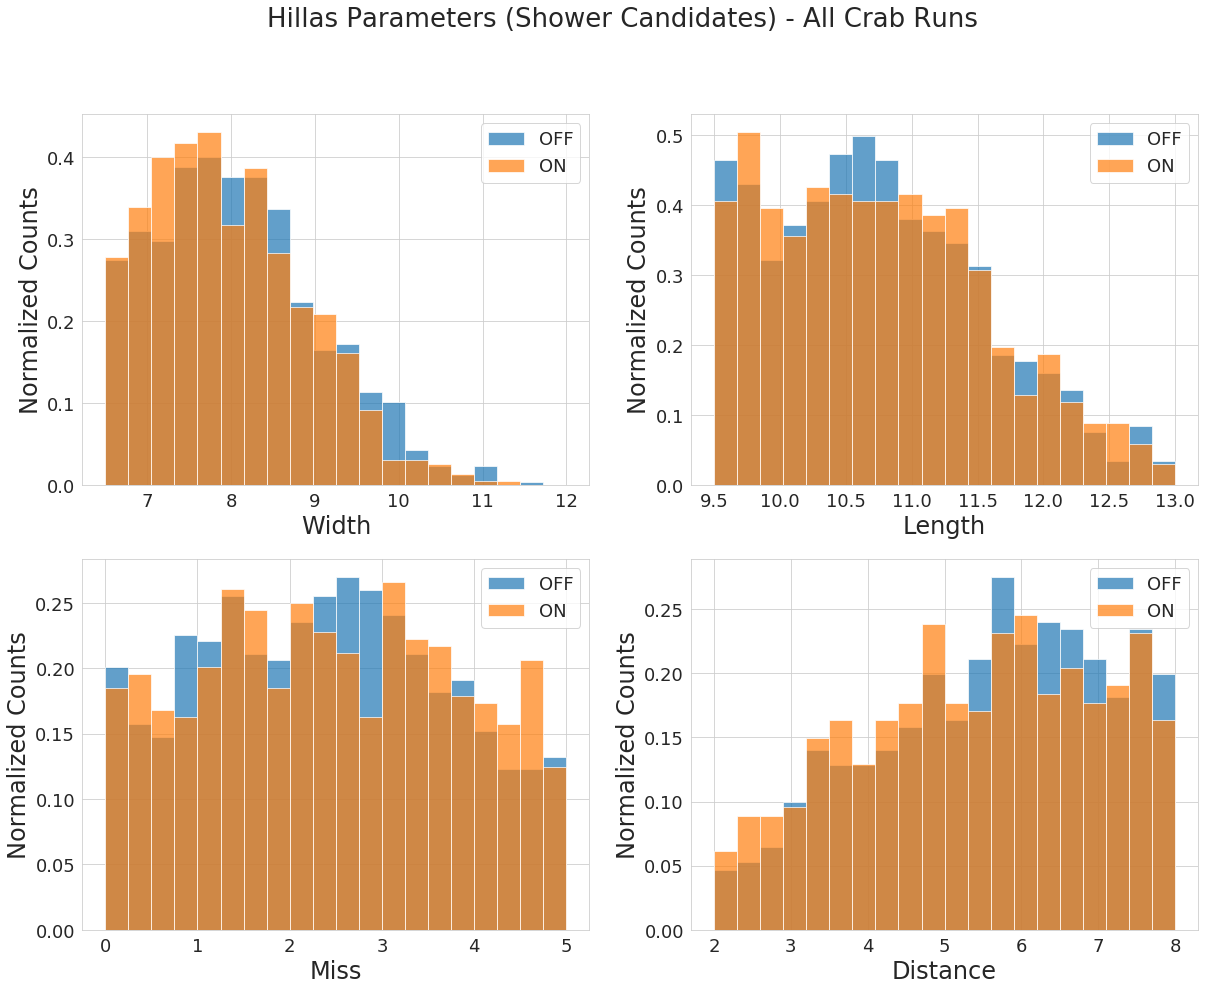

In [56]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
ax[0, 0].hist(width_off, bins=20, range=(6.5, 12.), alpha=0.7, density=True, label="OFF")
ax[0, 0].hist(width_on, bins=20, range=(6.5, 12.), alpha=0.7, density=True, label="ON")
ax[0, 0].set_xlabel("Width", fontsize=24)

ax[0, 1].hist(length_off, bins=20, range=(9.5, 13), alpha=0.7, label="OFF", density=True)
ax[0, 1].hist(length_on, bins=20, range=(9.5, 13), alpha=0.7, label="ON", density=True)
ax[0, 1].set_xlabel("Length", fontsize=24)

ax[1, 0].hist(miss_off, bins=20, range=(0, 5), alpha=0.7, label="OFF", density=True)
ax[1, 0].hist(miss_on, bins=20, range=(0, 5), alpha=0.7, label="ON", density=True)
ax[1, 0].set_xlabel("Miss", fontsize=24)

ax[1, 1].hist(dis_off, bins=20, range=(2, 8), alpha=0.7, label="OFF", density=True)
ax[1, 1].hist(dis_on, bins=20, range=(2, 8), alpha=0.7, label = "ON", density=True)
ax[1, 1].set_xlabel("Distance", fontsize=24)

for i in range(2):
    for j in range(2):
        ax[i, j].tick_params(labelsize=18)
        ax[i, j].set_ylabel("Normalized Counts", fontsize=24)
        ax[i, j].legend(fontsize=18)

fig.suptitle("Hillas Parameters (Shower Candidates) - All Crab Runs", fontsize=26)

Text(0.5, 0.98, 'Hillas Parameters (Shower Candidates) - All Crab Runs')

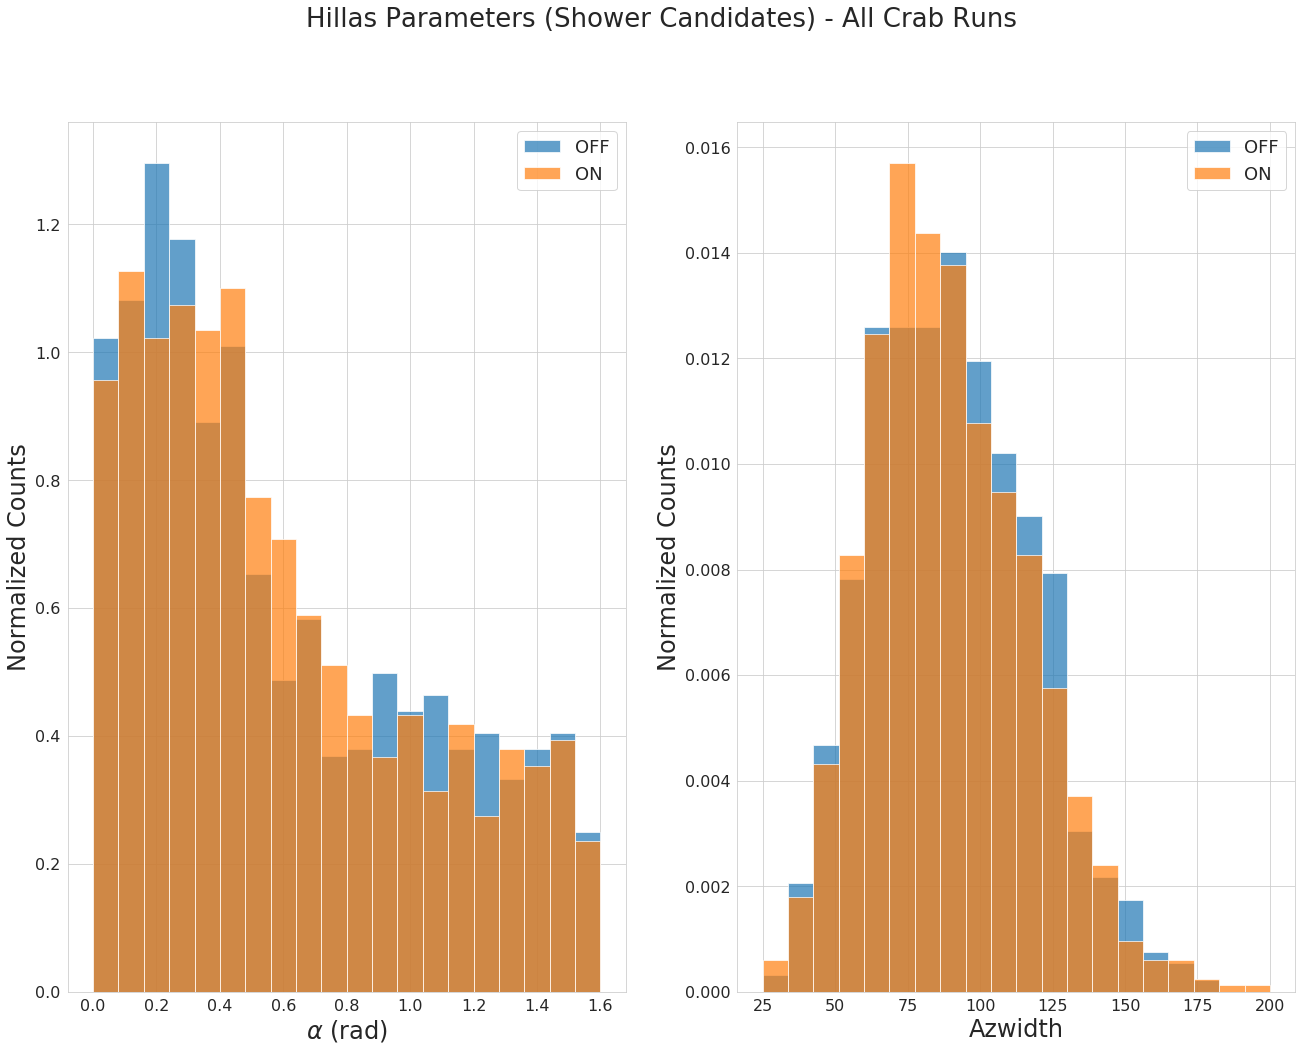

In [64]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(22,16))

ax[0].hist(alpha_off, bins=20, alpha=0.7, density=True, range=(0, 1.6), label="OFF")
ax[0].hist(alpha_on, bins=20, alpha=0.7, density=True, range=(0, 1.6), label="ON")
ax[0].set_xlabel(r"$\alpha$ (rad)", fontsize=24)
ax[0].set_ylabel("Normalized Counts", fontsize=24)
ax[0].legend(fontsize=18)
ax[0].tick_params(labelsize=16)

ax[1].hist(azwidth_off, bins=20, alpha=0.7, density=True, label="OFF", range=(25, 200))
ax[1].hist(azwidth_on, bins=20, alpha=0.7, density=True, label="ON", range=(25, 200))
ax[1].set_xlabel("Azwidth", fontsize=24)
ax[1].set_ylabel("Normalized Counts", fontsize=24)
ax[1].legend(fontsize=18)
ax[1].tick_params(labelsize=16)

fig.suptitle("Hillas Parameters (Shower Candidates) - All Crab Runs", fontsize=26)

Text(0.5, 0.98, 'All Crab Runs')

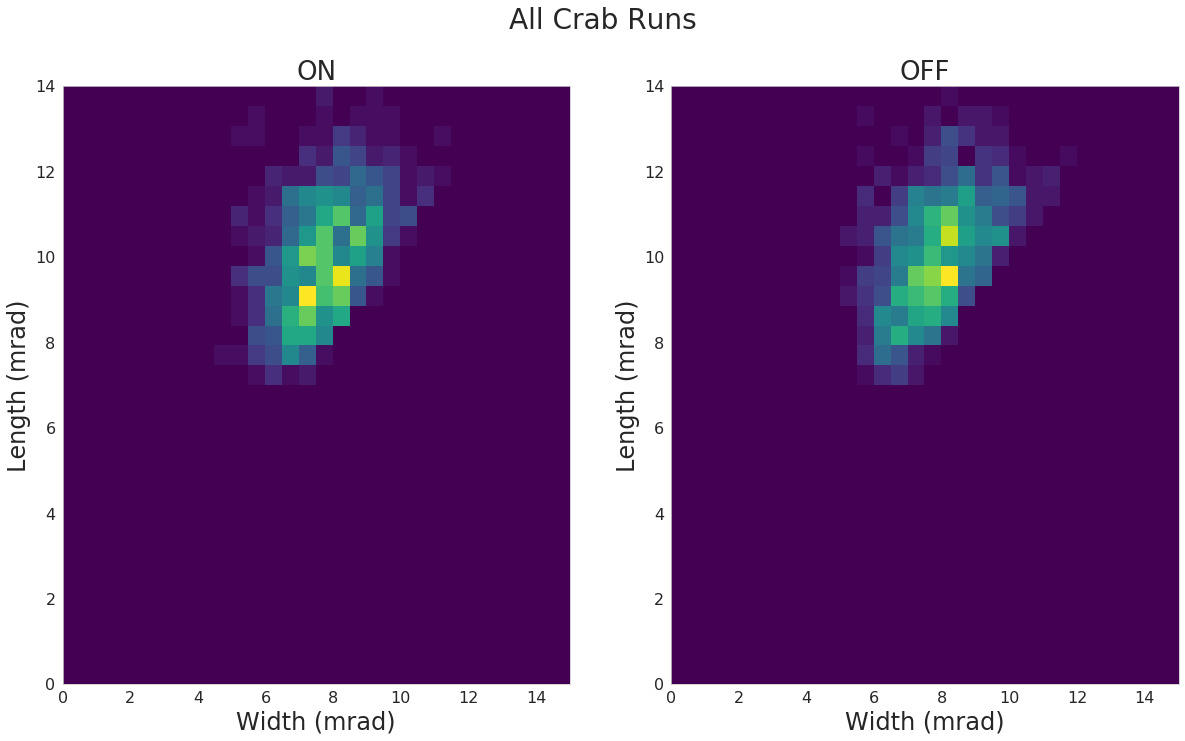

In [58]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 11))

ax[0].hist2d(width_on, length_on, bins=30, range=[[0, 15], [0, 14]], cmap="viridis", density=True)
ax[1].hist2d(width_off, length_off, bins=30, range=[[0, 15], [0, 14]], cmap="viridis", density=True)
ax[0].set_xlim(0, 15)
ax[0].set_ylim(0, 14)
ax[1].set_xlim(0, 15)
ax[1].set_ylim(0, 14)
ax[0].set_title("ON", fontsize=26)
ax[1].set_title("OFF", fontsize=26)
for i in range(2):
    ax[i].set_xlabel("Width (mrad)", fontsize=24)
    ax[i].set_ylabel("Length (mrad)", fontsize=24)
    ax[i].tick_params(labelsize=16)
fig.suptitle("All Crab Runs", fontsize=28)

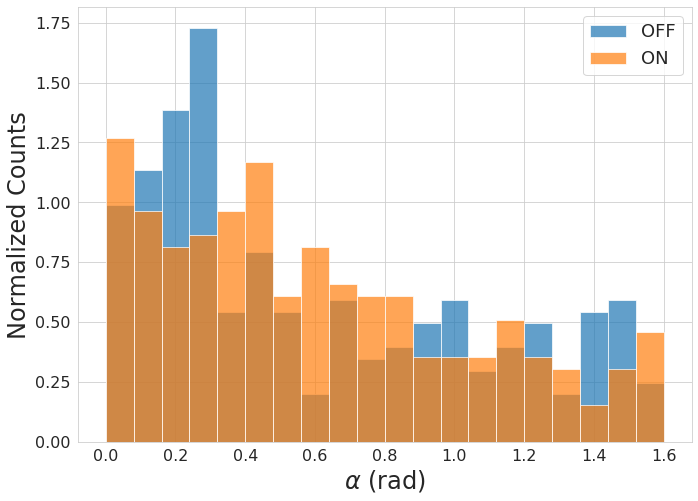

In [65]:
a_on = [val for i, val in enumerate(alpha_on) if width_on[i] < 7. and length_on[i] - width_on[i] < 8.8]
a_off = [val for i, val in enumerate(alpha_off) if width_off[i] < 7. and length_off[i] - width_off[i] < 8.8]

fig, ax = plt.subplots(figsize=(11,8))

ax.hist(a_off, bins=20, alpha=0.7, density=True, range=(0, 1.6), label="OFF")
ax.hist(a_on, bins=20, alpha=0.7, density=True, range=(0, 1.6), label="ON")
ax.set_xlabel(r"$\alpha$ (rad)", fontsize=24)
ax.set_ylabel("Normalized Counts", fontsize=24)
ax.legend(fontsize=18)
ax.tick_params(labelsize=16)